In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

data = pd.read_csv("data/Crop_recommendation.csv")

In [3]:
data.iloc[:,:]

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [7]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

C:\Users\Sai venkatesh\AppData\Local\Temp\ipykernel_22552\1766613416.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<AxesSubplot: >

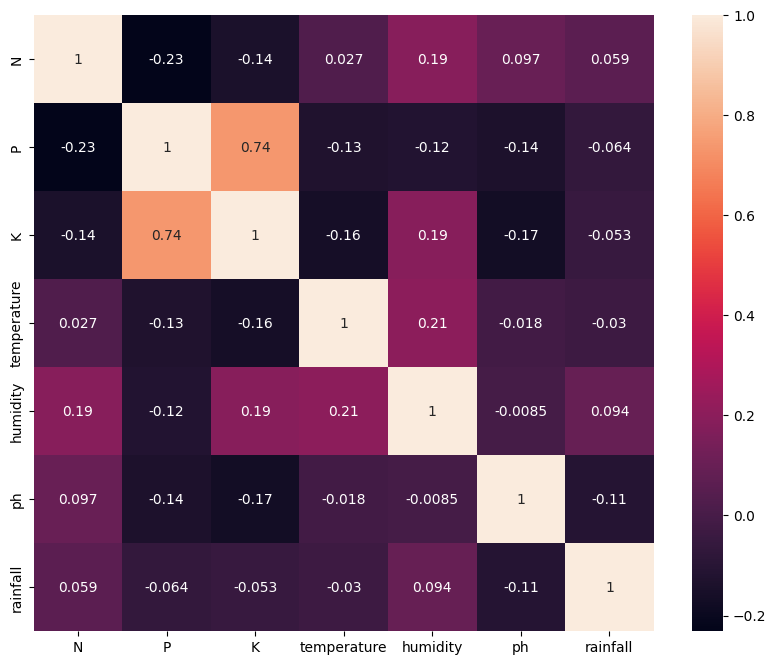

In [8]:
pt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

In [9]:
data.corr()   

C:\Users\Sai venkatesh\AppData\Local\Temp\ipykernel_22552\394172756.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


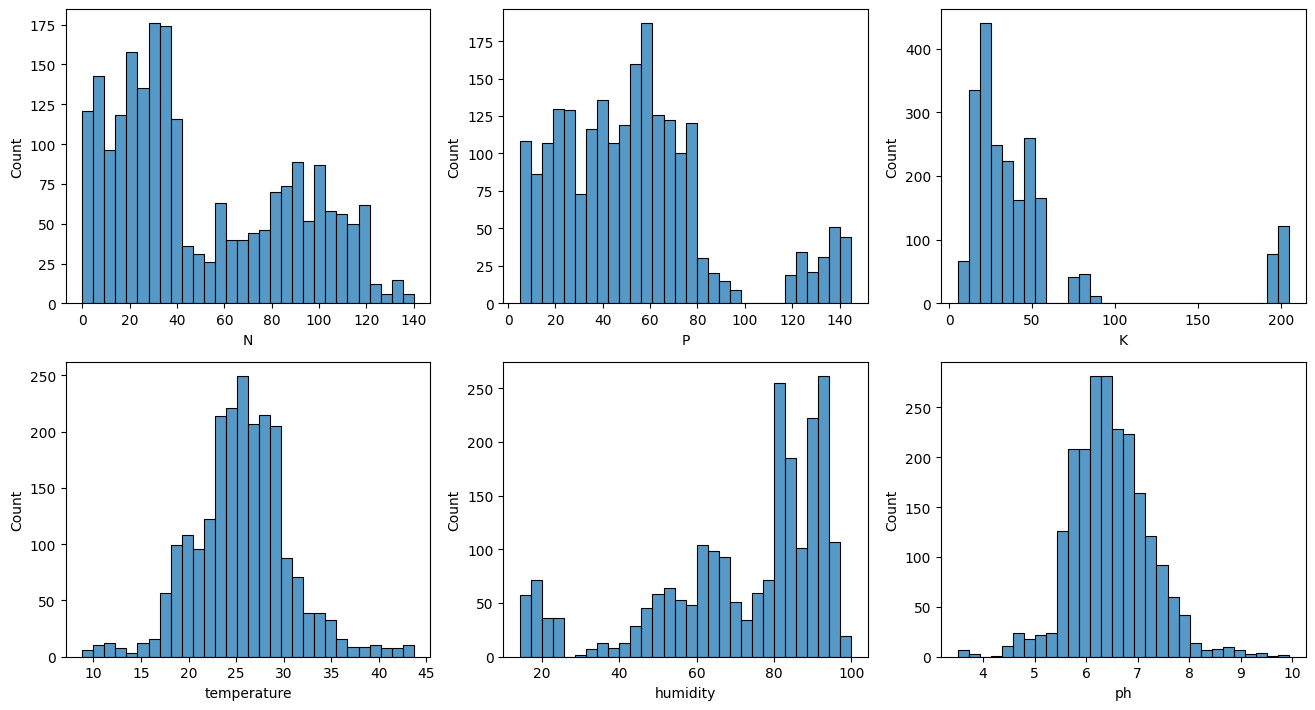

<AxesSubplot: ylabel='Count'>

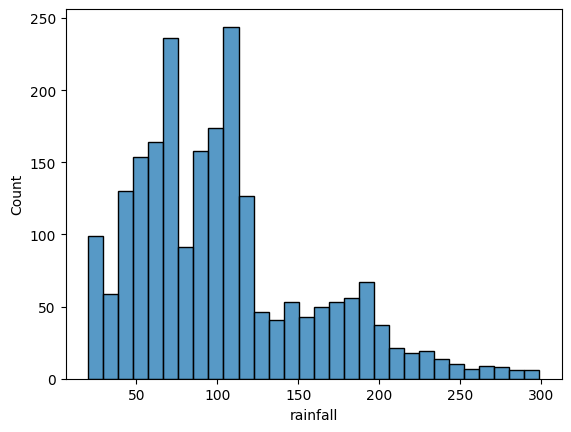

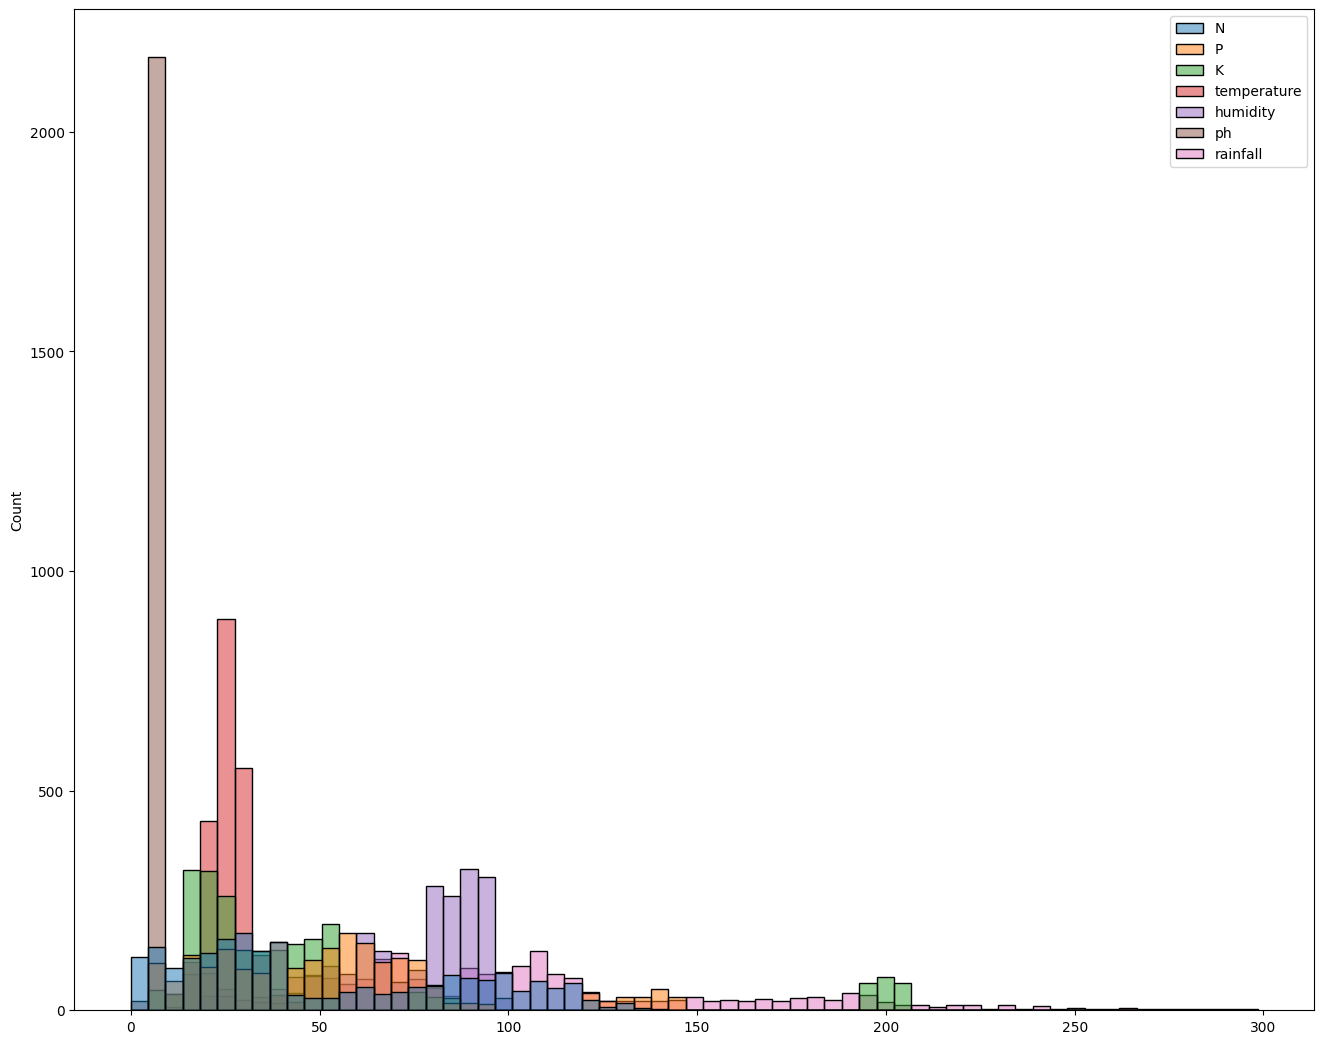

In [10]:
cols = data.columns[:-1]
pt.figure(figsize=(16,13))

i=1
for c in cols[:-1]:
    pt.subplot(3,3,i)
    sns.histplot(data[c],bins=30)
    i+=1
pt.show()

sns.histplot(data[cols[-1]],bins=30)
pt.figure(figsize=(16,13))
sns.histplot(data[cols])

Valus vs Crops


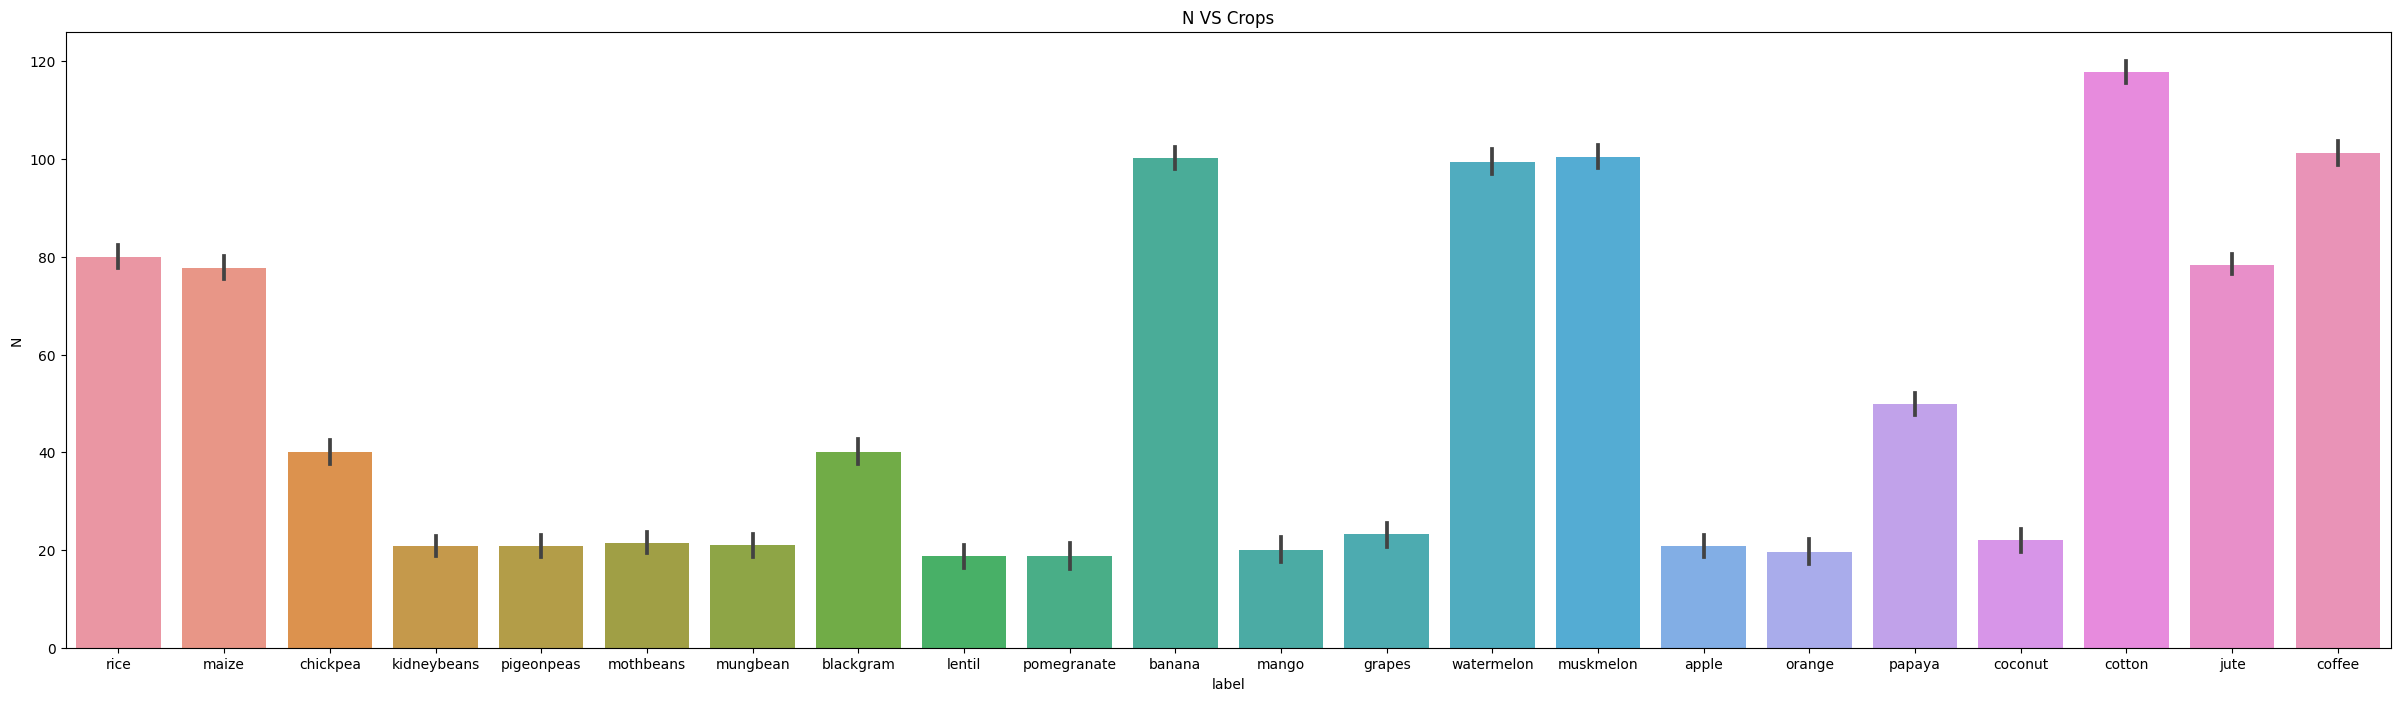

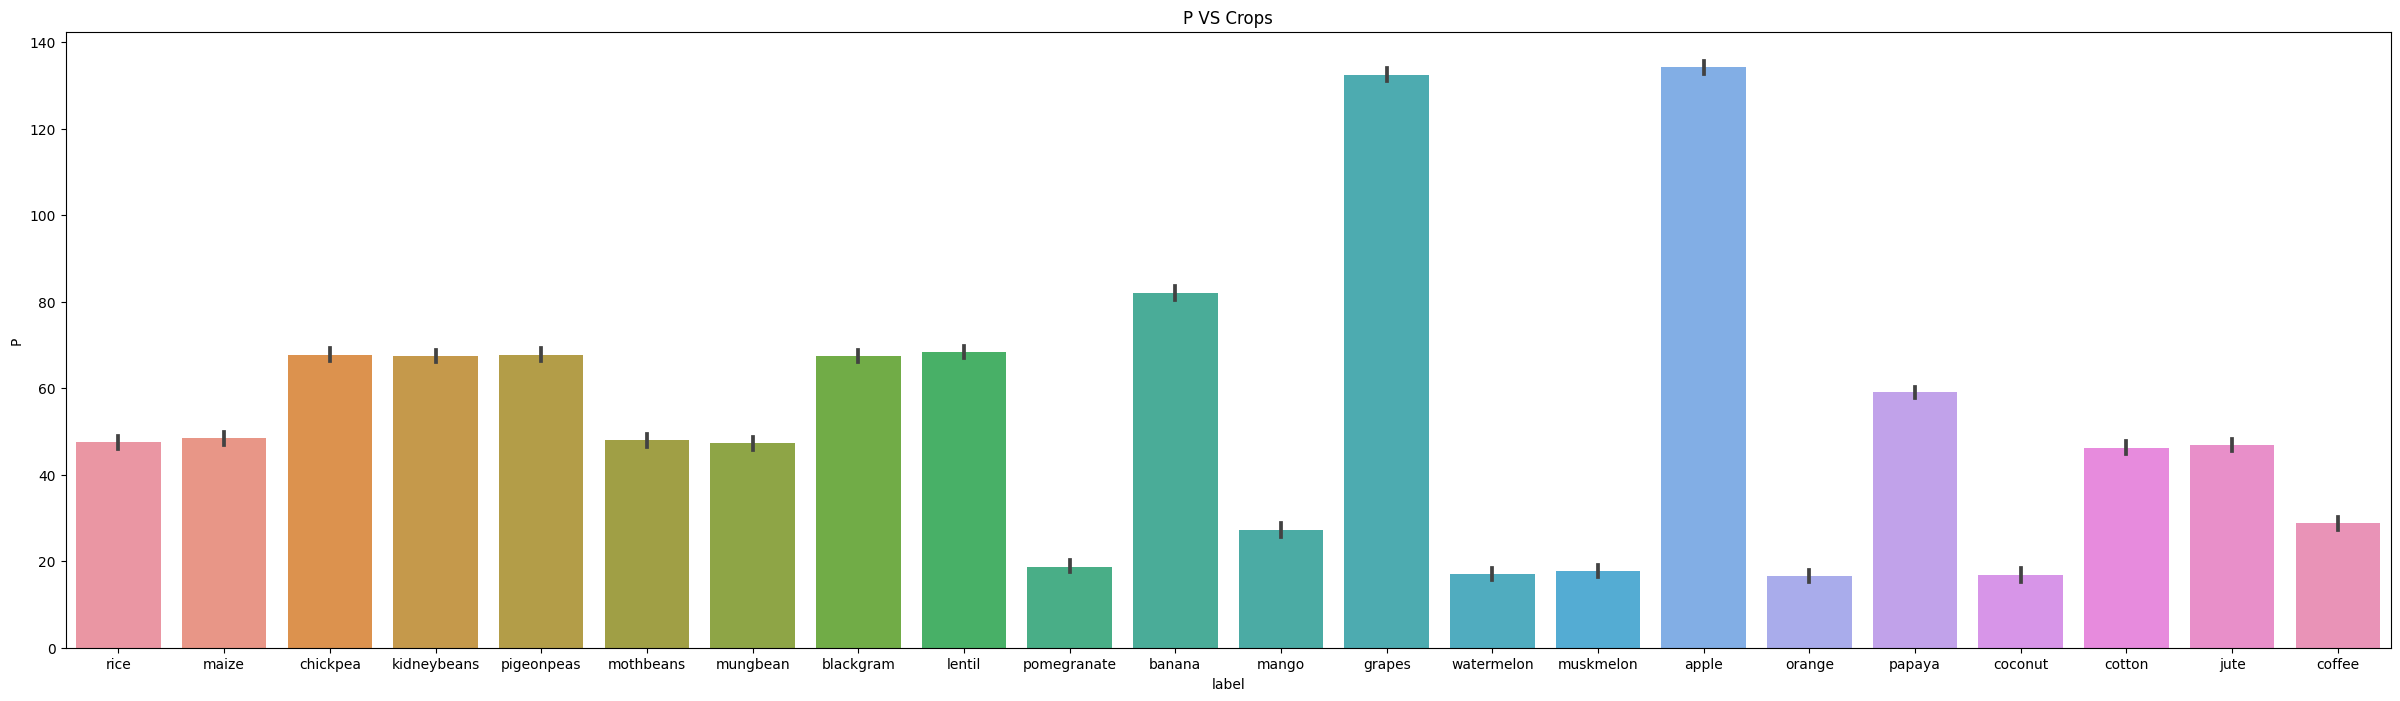

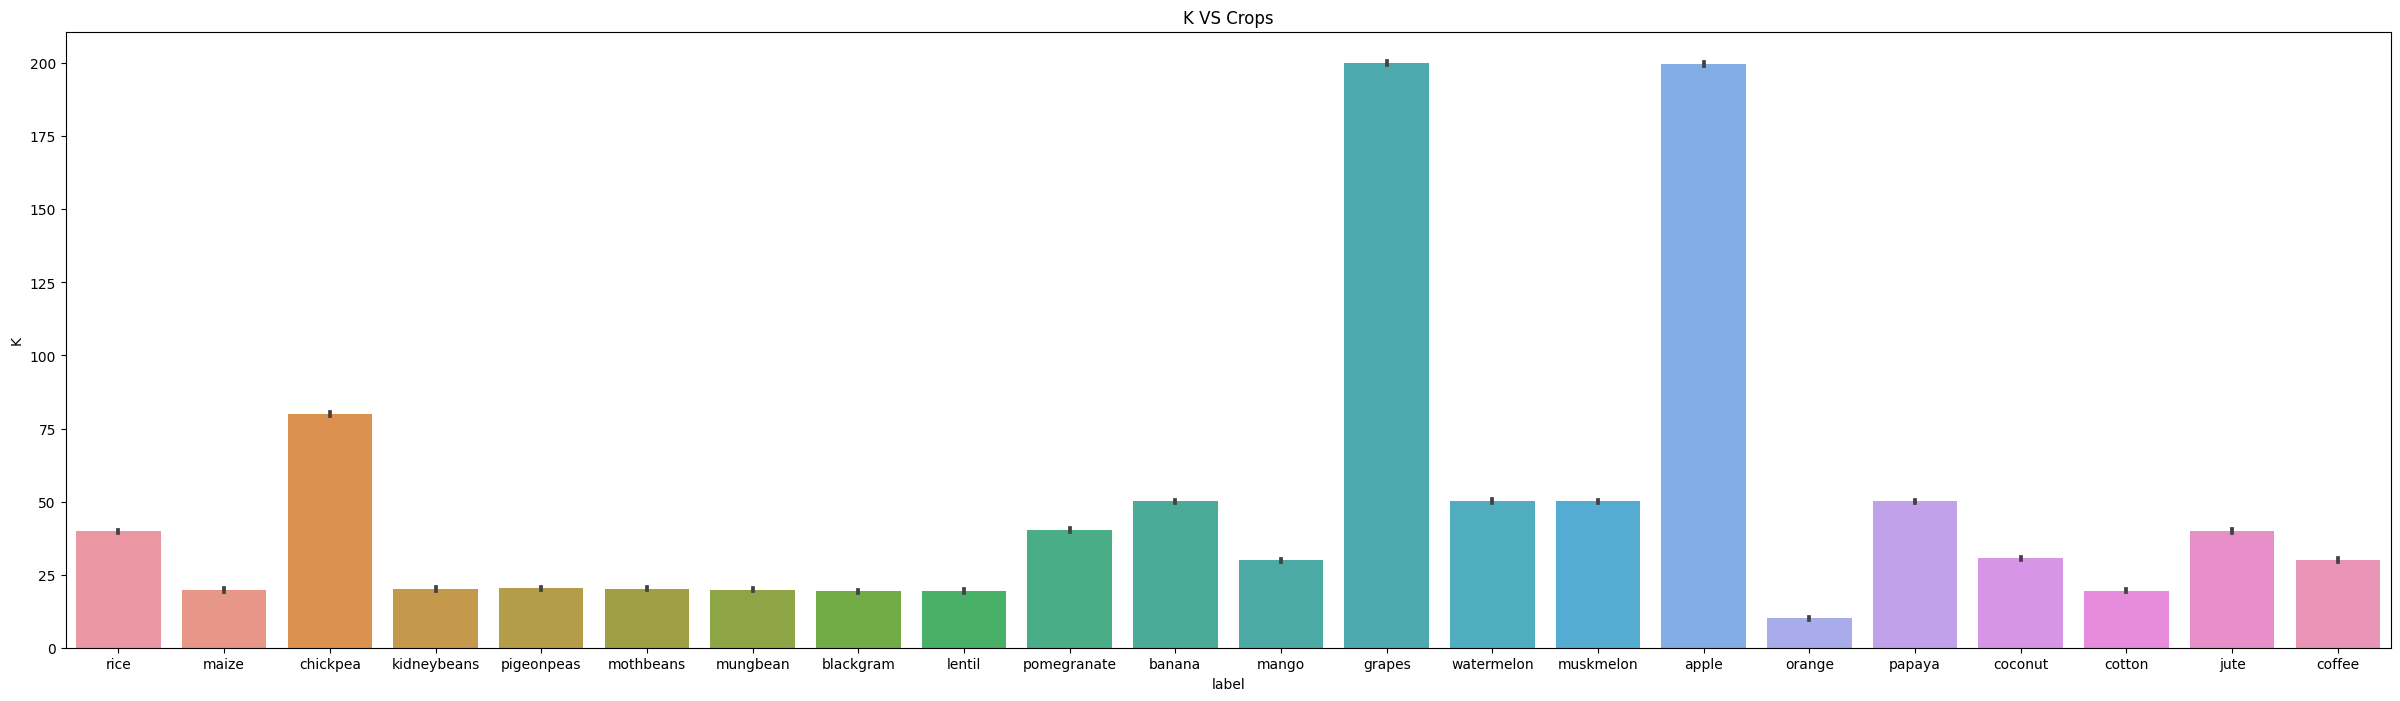

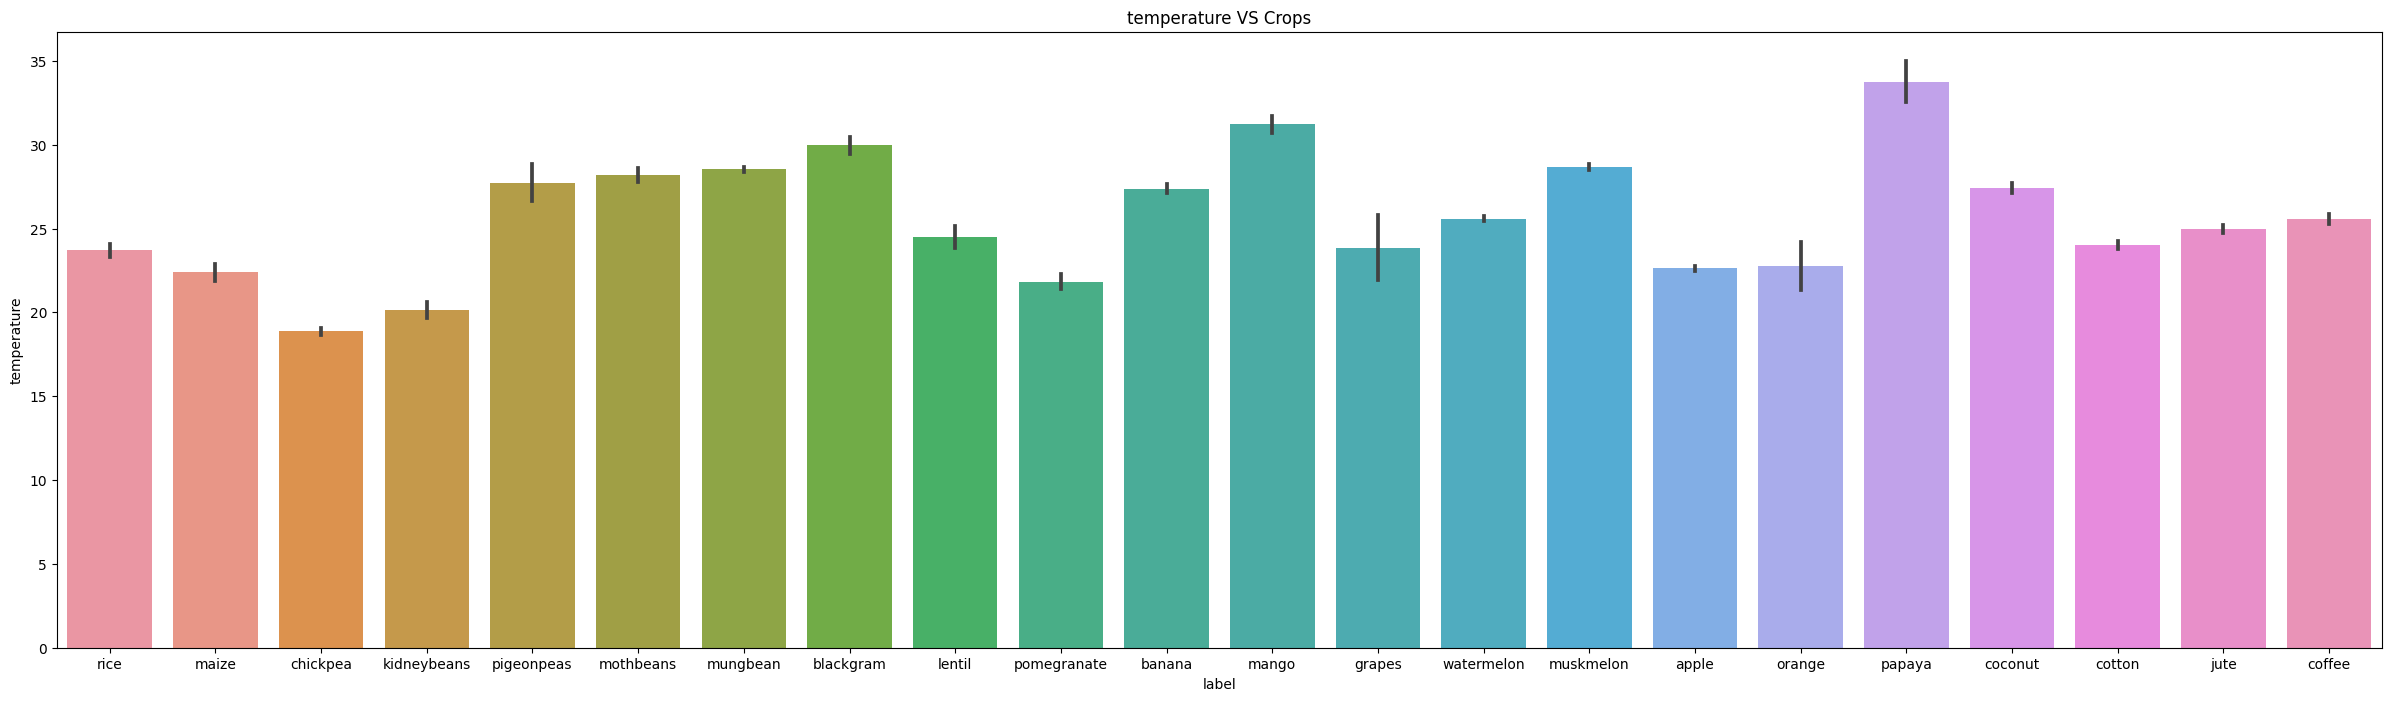

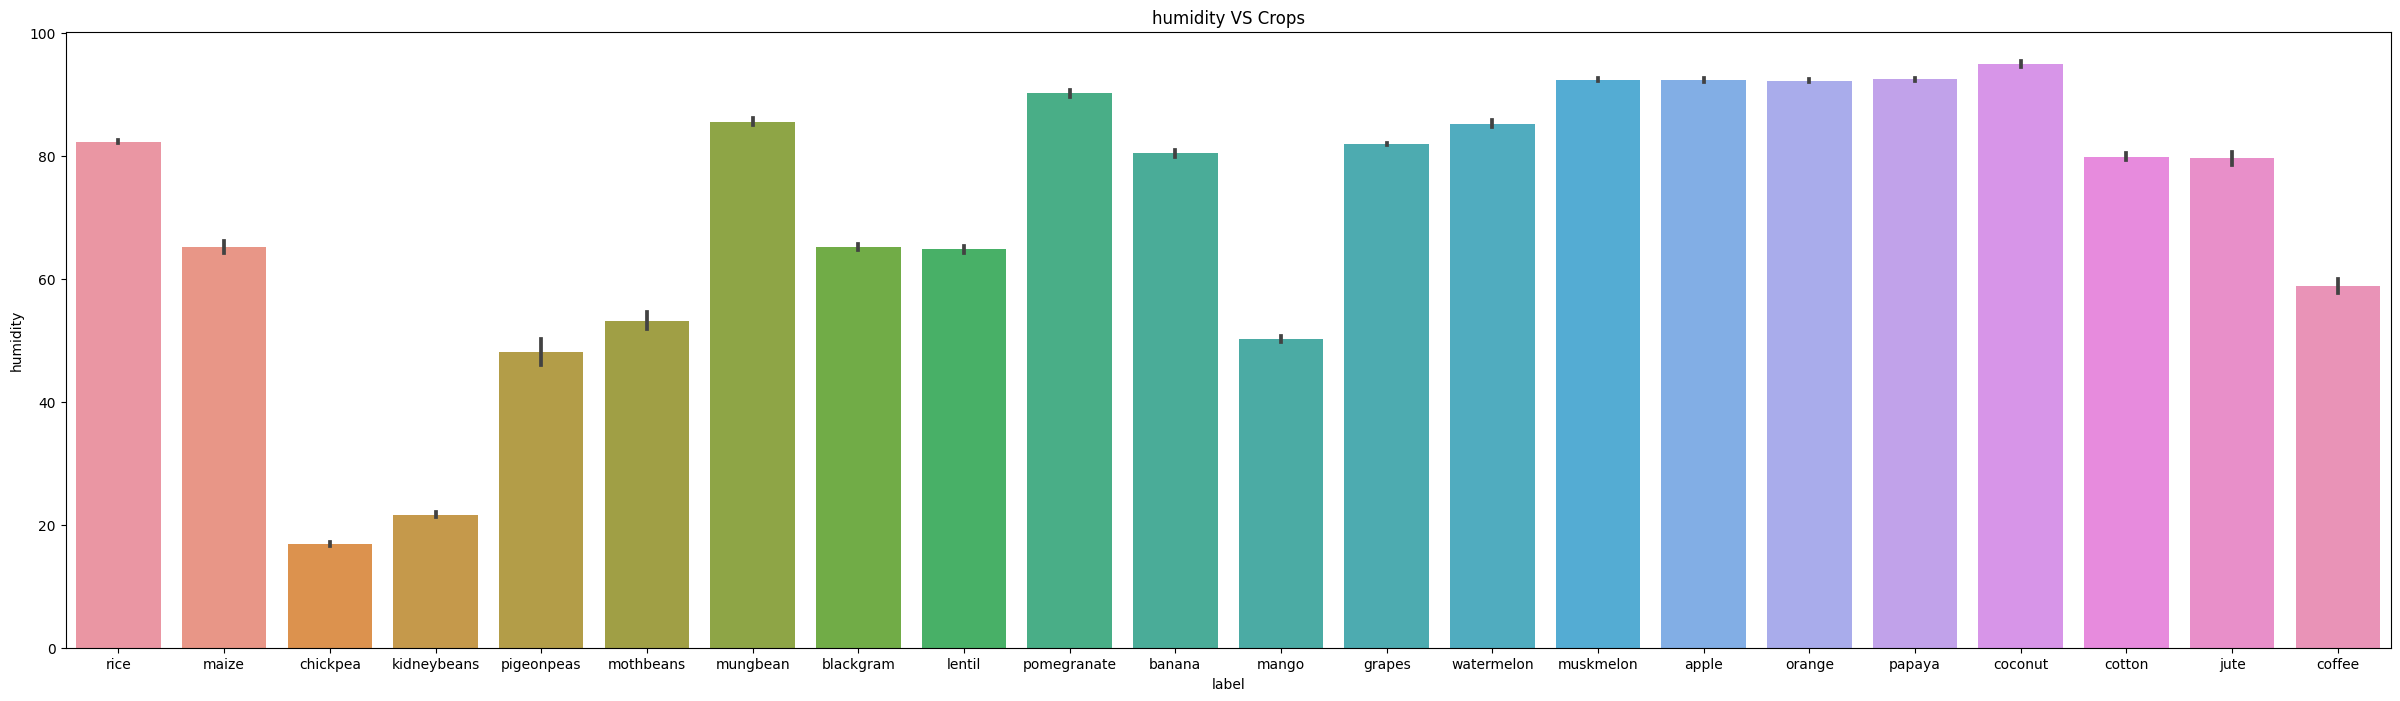

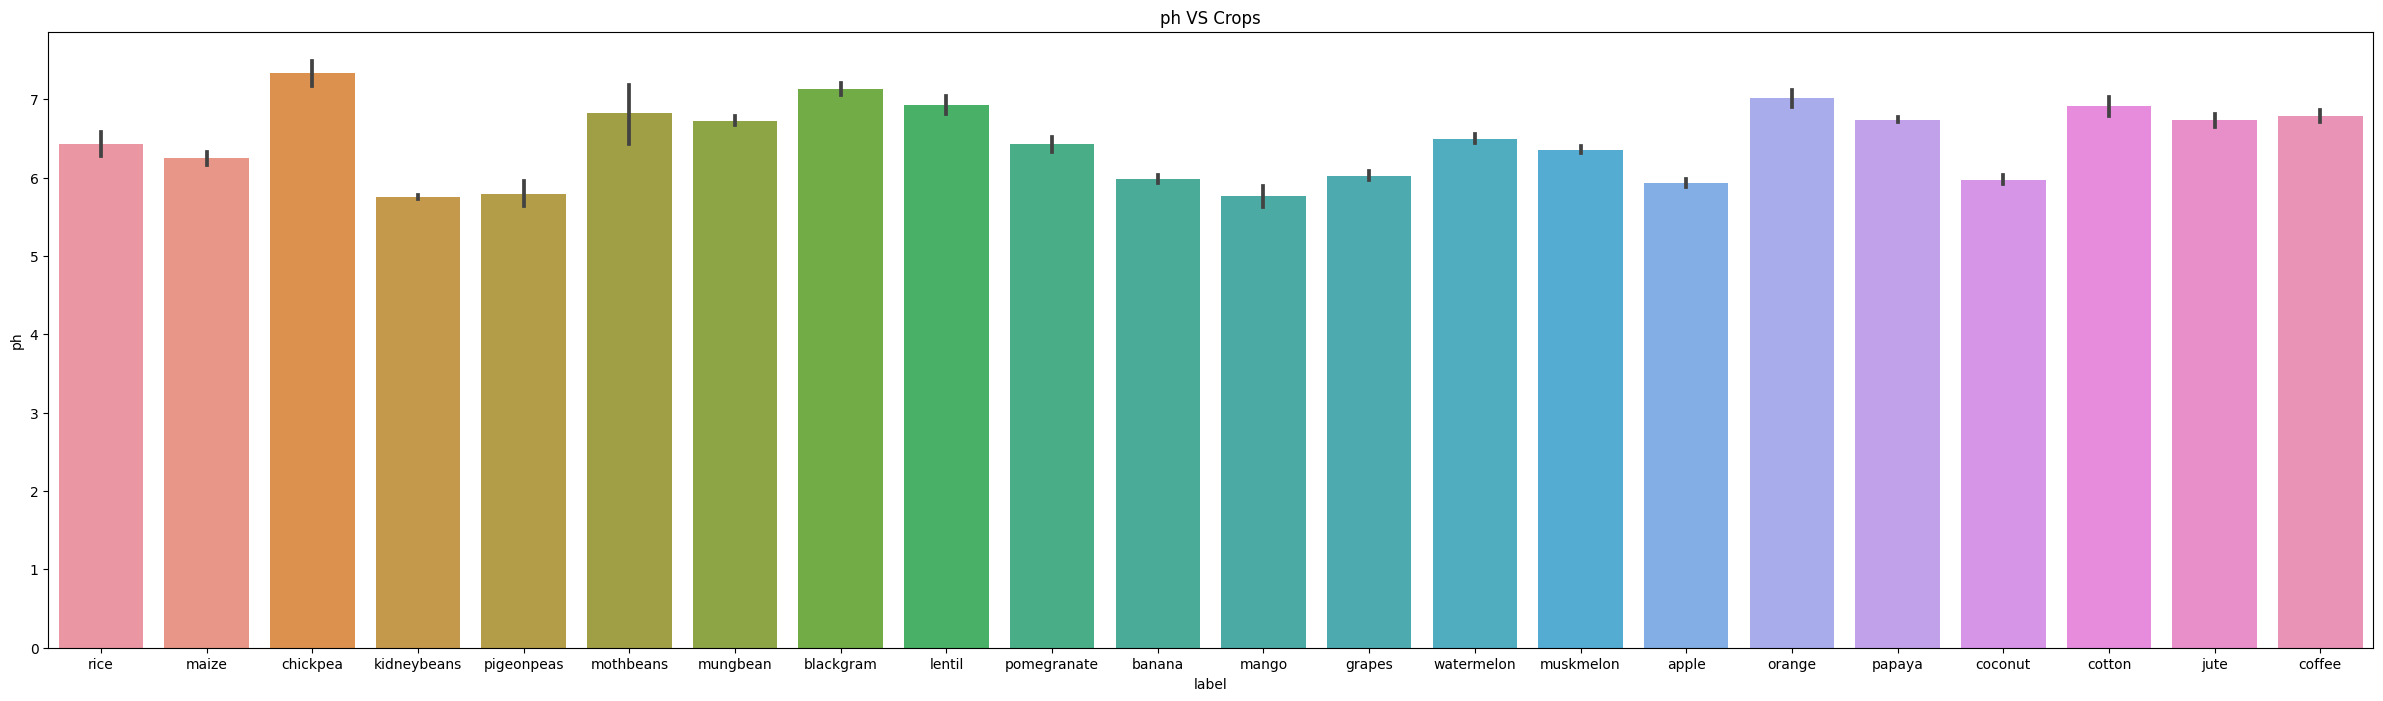

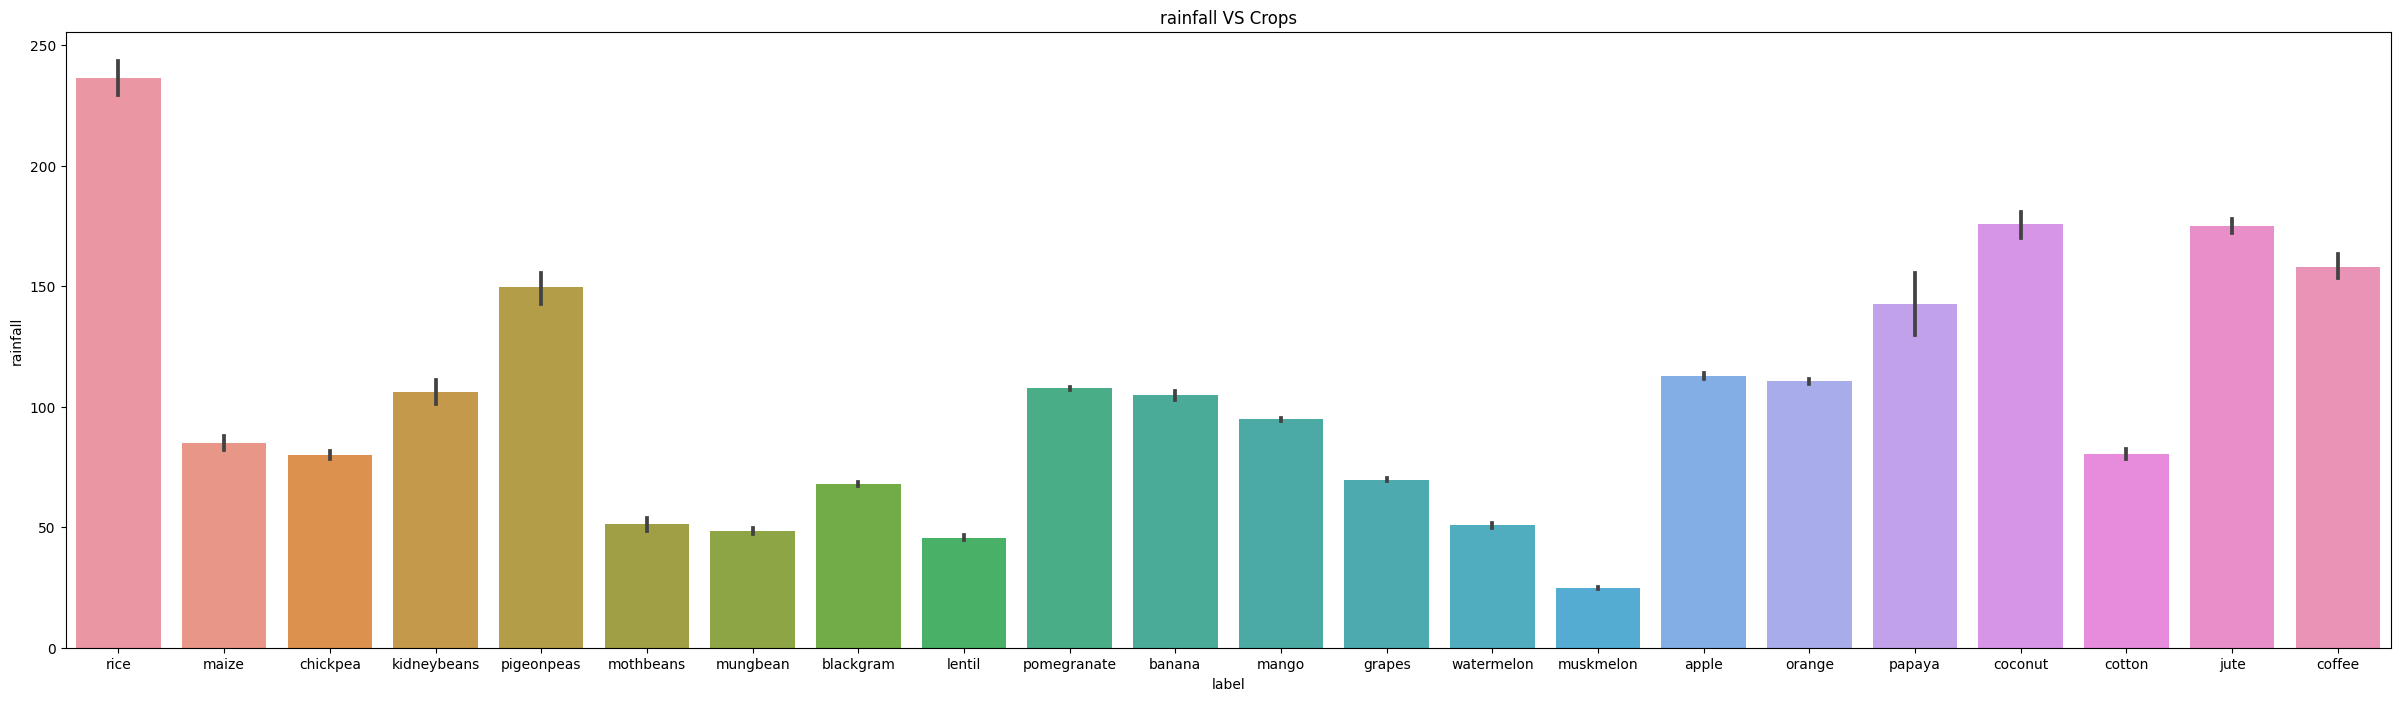

In [11]:
print("Valus vs Crops")
for c in cols:
    pt.figure(figsize=(30,8))
    sns.barplot(x="label",y=c,data=data)
    pt.title(f"{c} VS Crops")
    pt.show()

In [12]:
labels = data['label'].unique()

In [13]:
labeled_data = {}
l=0
for x in labels:
    labeled_data[x] = l
    l+=1

In [14]:
label_val = list(labeled_data.values())
print(labeled_data)

print(labels)
print(label_val)

{'rice': 0, 'maize': 1, 'chickpea': 2, 'kidneybeans': 3, 'pigeonpeas': 4, 'mothbeans': 5, 'mungbean': 6, 'blackgram': 7, 'lentil': 8, 'pomegranate': 9, 'banana': 10, 'mango': 11, 'grapes': 12, 'watermelon': 13, 'muskmelon': 14, 'apple': 15, 'orange': 16, 'papaya': 17, 'coconut': 18, 'cotton': 19, 'jute': 20, 'coffee': 21}
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [15]:
label_seasons = {'rice': 'Kharif', 'maize': 'Kharif', 'chickpea': 'Rabi', 'kidneybeans': 'Whole Year', 'pigeonpeas': 'Kharif', 
                 'mothbeans': 'Kharif', 'mungbean': 'Whole year', 'blackgram': 'Whole Year', 'lentil': 'Rabi', 'pomegranate': 'Kharif', 
                 'banana': 'Kharif', 'mango': 'Rabi', 'grapes': 'Rabi', 'watermelon': 'Kharif', 'muskmelon': 'Zaid', 'apple': 'Kharif', 
                 'orange': 'Rabi', 'papaya': 'Kharif', 'coconut': 'Kharif', 'cotton': 'Kharif', 'jute': 'Kharif', 'coffee': 'Kharif'}

In [16]:
data['encoded_lab'] = data.label.map(labeled_data)
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label,encoded_lab
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0


In [17]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label,encoded_lab
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,21
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,21
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,21
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,21
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,21


In [18]:
#Input and Output separate
X = data.drop(['label','encoded_lab'],axis=1)
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [19]:
Y = data['encoded_lab']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: encoded_lab, dtype: int64

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [21]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train.shape

(1760, 7)

In [22]:
#ANN MODEL
model = tf.keras.Sequential()
model.add(keras.layers.Dense(28,input_shape=(7,),activation='relu'))
model.add(keras.layers.Dense(64,input_shape=(7,),activation='relu'))
model.add(keras.layers.Dense(28,input_shape=(7,),activation='relu'))
model.add(keras.layers.Dense(22,input_shape=(7,),activation='softmax'))

In [23]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28)                224       
                                                                 
 dense_1 (Dense)             (None, 64)                1856      
                                                                 
 dense_2 (Dense)             (None, 28)                1820      
                                                                 
 dense_3 (Dense)             (None, 22)                638       
                                                                 
Total params: 4,538
Trainable params: 4,538
Non-trainable params: 0
_________________________________________________________________


In [25]:
his = model.fit(x=x_train,y=y_train,epochs=150,batch_size=50)

Epoch 1/150


36/36 [==============================] - 1s 3ms/step - loss: 2.9570 - accuracy: 0.1653
Epoch 2/150
36/36 [==============================] - 0s 3ms/step - loss: 2.5014 - accuracy: 0.3915
Epoch 3/150
36/36 [==============================] - 0s 3ms/step - loss: 1.7843 - accuracy: 0.5898
Epoch 4/150
36/36 [==============================] - 0s 3ms/step - loss: 1.1213 - accuracy: 0.7392
Epoch 5/150
36/36 [==============================] - 0s 2ms/step - loss: 0.7227 - accuracy: 0.8222
Epoch 6/150
36/36 [==============================] - 0s 2ms/step - loss: 0.5093 - accuracy: 0.8920
Epoch 7/150
36/36 [==============================] - 0s 2ms/step - loss: 0.3845 - accuracy: 0.8960
Epoch 8/150
36/36 [==============================] - 0s 3ms/step - loss: 0.2959 - accuracy: 0.9335
Epoch 9/150
36/36 [==============================] - 0s 3ms/step - loss: 0.2375 - accuracy: 0.9460
Epoch 10/150
36/36 [==============================] - 0s 3ms/step - loss: 0.2008 - accuracy: 0.9551
Epoch 11/150
36/36 [=

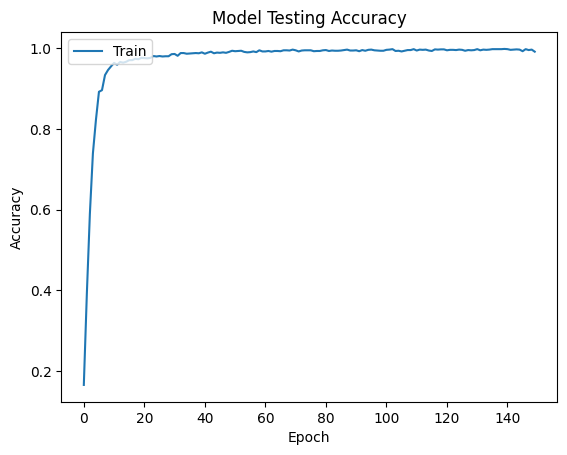

In [26]:
pt.plot(his.history['accuracy'])
pt.title("Model Testing Accuracy")
pt.ylabel('Accuracy')
pt.xlabel('Epoch')
pt.legend(['Train','Test'],loc='upper left')
pt.show()

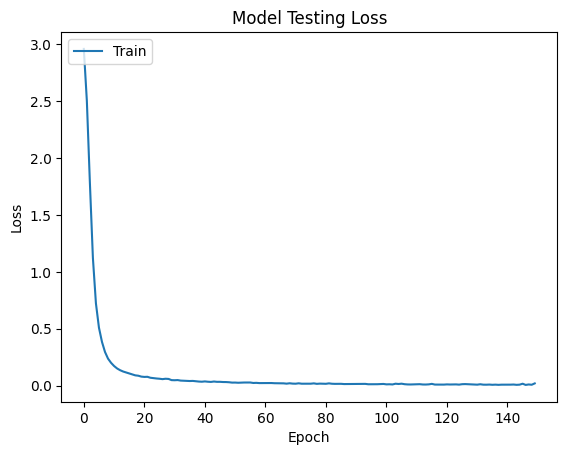

In [27]:
pt.plot(his.history['loss'])
pt.title("Model Testing Loss")
pt.ylabel('Loss')
pt.xlabel('Epoch')
pt.legend(['Train','Test'],loc='upper left')
pt.show()

In [28]:
test_evaluation = model.evaluate(x_test,y_test)

14/14 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 0.9886


In [29]:
print(x_test[0])

[-0.69281935  2.34201324  3.00358047 -1.49415156  0.44319919 -0.87423369
 -0.58610489]


In [30]:
probs = model.predict(scaler.transform(np.array([x_test[0]])))
best_3 = np.argsort(probs, axis=1)[:,-3:]
best_3_val =  np.partition(probs, -3,axis=None)[-3:]

c:\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 138ms/step


In [31]:
fin_label=[]
fin_prob=[]
for i in best_3:
    for j in i[::-1]:
        fin_label.append(labels[j])
fin_prob = best_3_val[::-1]

In [32]:
prob_dict = dict(zip(fin_label,fin_prob))
prob_dict

{'mothbeans': 1.0, 'mango': 4.1841717e-15, 'orange': 9.578546e-29}

In [33]:
season_dict = dict(zip(fin_label,[label_seasons[i] for i in fin_label]))
season_dict

{'mothbeans': 'Kharif', 'mango': 'Rabi', 'orange': 'Rabi'}

In [34]:
print(labels[np.argmax(model.predict(scaler.transform(np.array([x_test[0]]))))])

1/1 [==============================] - 0s 42ms/step
mothbeans


c:\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [35]:
print(f"Train Accuracy:{his.history['accuracy'][-1]*100}")
print(f"Test Accuracy:{test_evaluation[-1]*100}")

Train Accuracy:99.14772510528564
Test Accuracy:98.86363744735718


In [36]:
#testing using random values
test_1 = scaler.transform(np.array([[30,28,30,32,52,5,98]]))
prediction = np.argmax(model.predict(test_1))
print(labels[prediction])

test_2 = scaler.transform(np.array([[104, 18, 30, 24, 60, 7, 141]]))
prediction = np.argmax(model.predict(test_2))
print(labels[prediction])


c:\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
mango


c:\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 36ms/step
coffee


In [37]:
import pickle
with open('scaler.pickle', 'wb') as handle:
    pickle.dump(scaler, handle, protocol=pickle.HIGHEST_PROTOCOL)